In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df_aeronefs = pd.read_csv("/Users/um/Desktop/Wild Code School/Top_gun/Datasets/df_aeronef/df_aeronef_clean.csv")
df_composants = pd.read_csv("/Users/um/Desktop/Wild Code School/Top_gun/Datasets/df_composants/df_composants_clean.csv")
df_degradations = pd.read_csv("/Users/um/Desktop/Wild Code School/Top_gun/Data_clean/degradations_full_cleaned.csv")
df_logs_vols = pd.read_csv("/Users/um/Desktop/Wild Code School/Top_gun/Data_clean/logs_vols_full_cleaned.csv")

In [112]:
display(df_aeronefs.head(1))
display(df_composants.head(1))
display(df_degradations.head(1))
display(df_logs_vols.head(1))

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
0,E170_6353,E170,2000-03-17,2024-03-27,0,1970-01-01


,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout
0,REAE170-E170_6353-0,2,E170_6353,Réacteur gauche,13045.0,53.308375,15552.0


,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement
0,D003661,E170_6353,REAE170-E170_6353-0,54.0,2024-06-06,0


,ref_vol,aero_linked,jour_vol,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²
0,V09972247,B757_0375,2024-06-06,3.5,0,6.4,911.2,0.009


# Je renomme la colonne clé 'id_aero' pour merger les tables

In [113]:
# renomer la colonne clé pour merger les tables
df_aeronefs.rename(columns={"ref_aero": "id_aero"}, inplace=True)
df_composants.rename(columns={"aero": "id_aero"}, inplace=True)
df_degradations.rename(columns={"linked_aero": "id_aero"}, inplace=True)
df_logs_vols.rename(columns={"aero_linked": "id_aero"}, inplace=True)

In [114]:
df = pd.merge(df_composants, df_aeronefs, on='id_aero')
df = pd.merge(df, df_degradations, on='id_aero')
df = pd.merge(df, df_logs_vols, on='id_aero')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882900 entries, 0 to 882899
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ref_compo           882900 non-null  object 
 1   categorie           882900 non-null  int64  
 2   id_aero             882900 non-null  object 
 3   desc                882900 non-null  object 
 4   lifespan            882900 non-null  float64
 5   taux_usure_actuel   882900 non-null  float64
 6   cout                882900 non-null  float64
 7   type_model          882900 non-null  object 
 8   debut_service       882900 non-null  object 
 9   last_maint          882900 non-null  object 
 10  en_maintenance      882900 non-null  int64  
 11  end_maint           882900 non-null  object 
 12  ref_deg             882900 non-null  object 
 13  compo_concerned     882900 non-null  object 
 14  usure_nouvelle      882900 non-null  float64
 15  measure_day         832275 non-nul

# Suppression des colonnes inutiles apres avoir merger les tables


In [116]:
df.drop(columns = ['ref_compo', 'ref_deg', 'ref_vol', 'compo_concerned'], inplace=True)

In [204]:
df.head(10)

,id_aero,categorie,type_model,desc,debut_service,last_maint,jour_vol,measure_day,end_maint,lifespan,...,usure_nouvelle,time_en_air,temp en °C,pressure en hPa,vibrations en m/s²,cout,en_maintenance,need_replacement,etat_voyant,Predictions_voyant
0,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,54.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
1,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,51.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
2,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,18.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
3,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,8.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
4,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,43.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
5,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,7.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
6,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,23.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
7,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,27.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
8,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,4.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
9,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,32.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0


# histogrammes des variables continues

<Figure size 1500x1000 with 0 Axes>

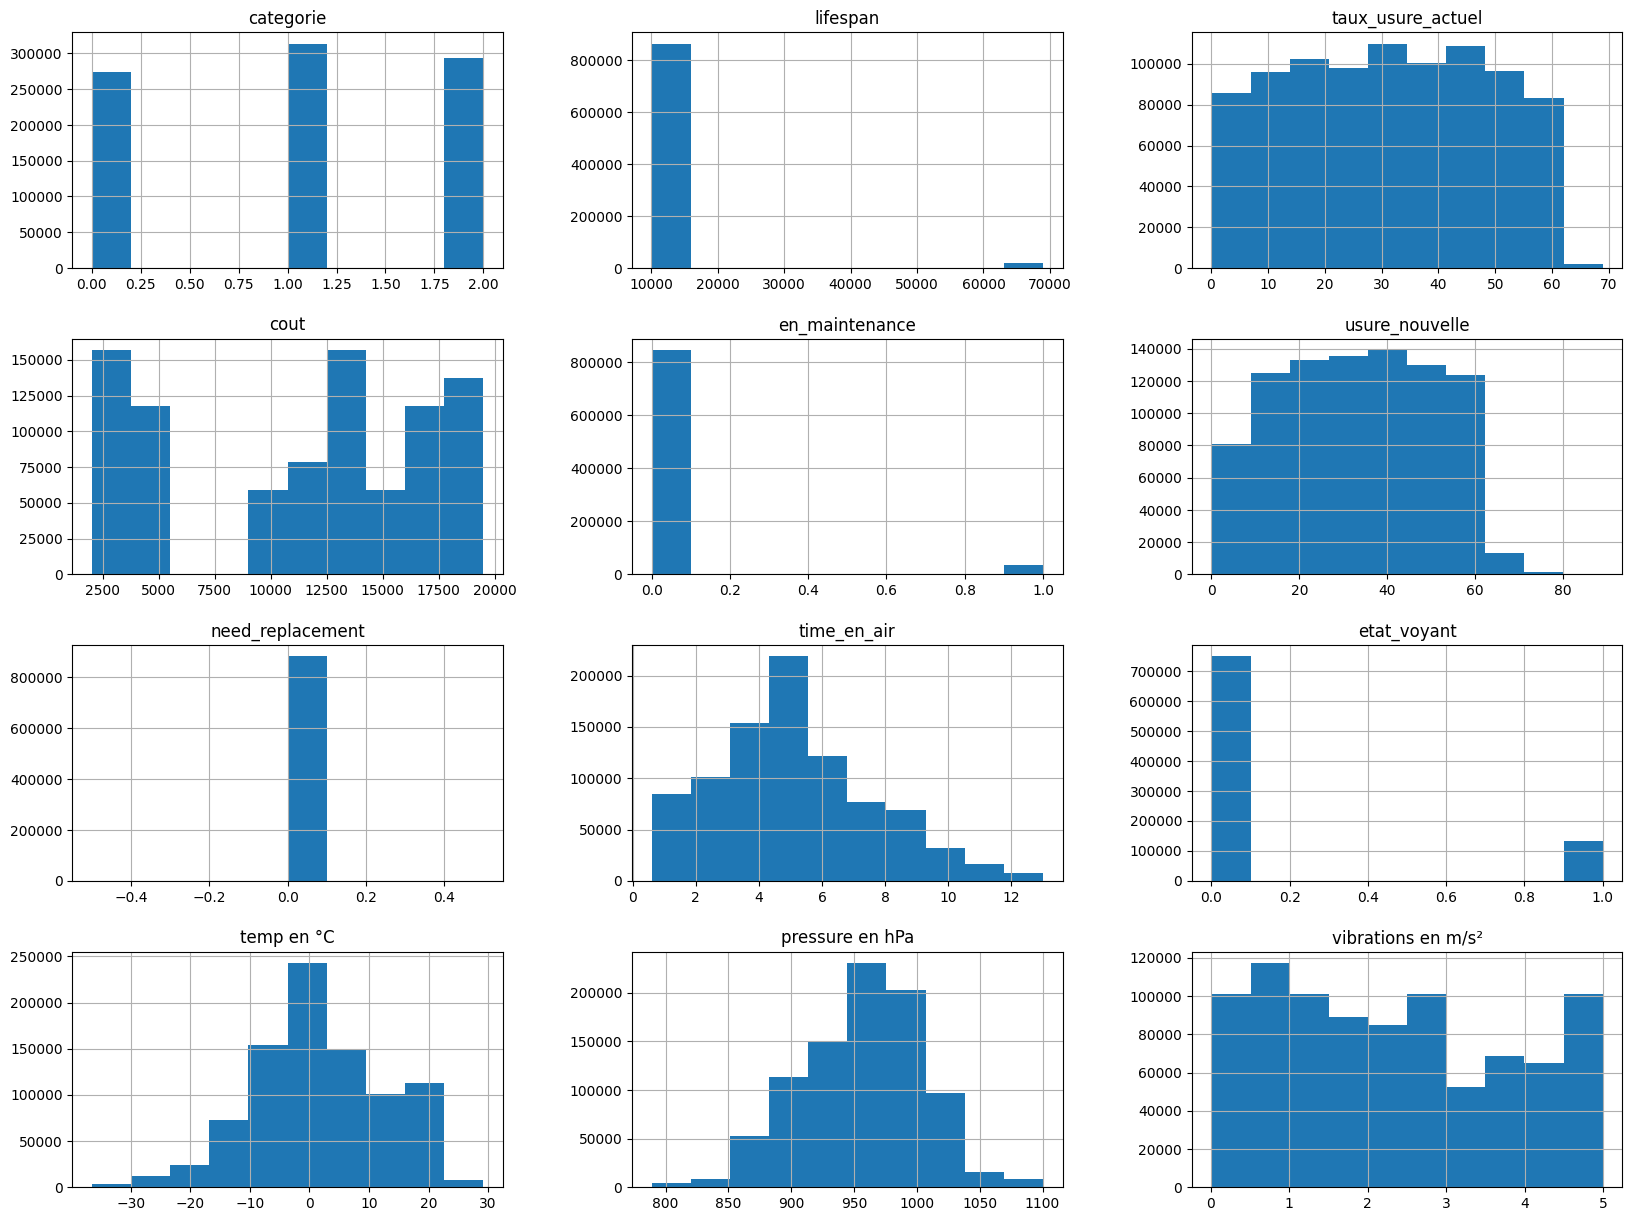

In [118]:
plt.figure(figsize=(15, 10))
numerical_columns = df.select_dtypes(include=["float", "int"]).hist(figsize=(20, 15))

plt.show()

# matrice de corrélation des variables continues

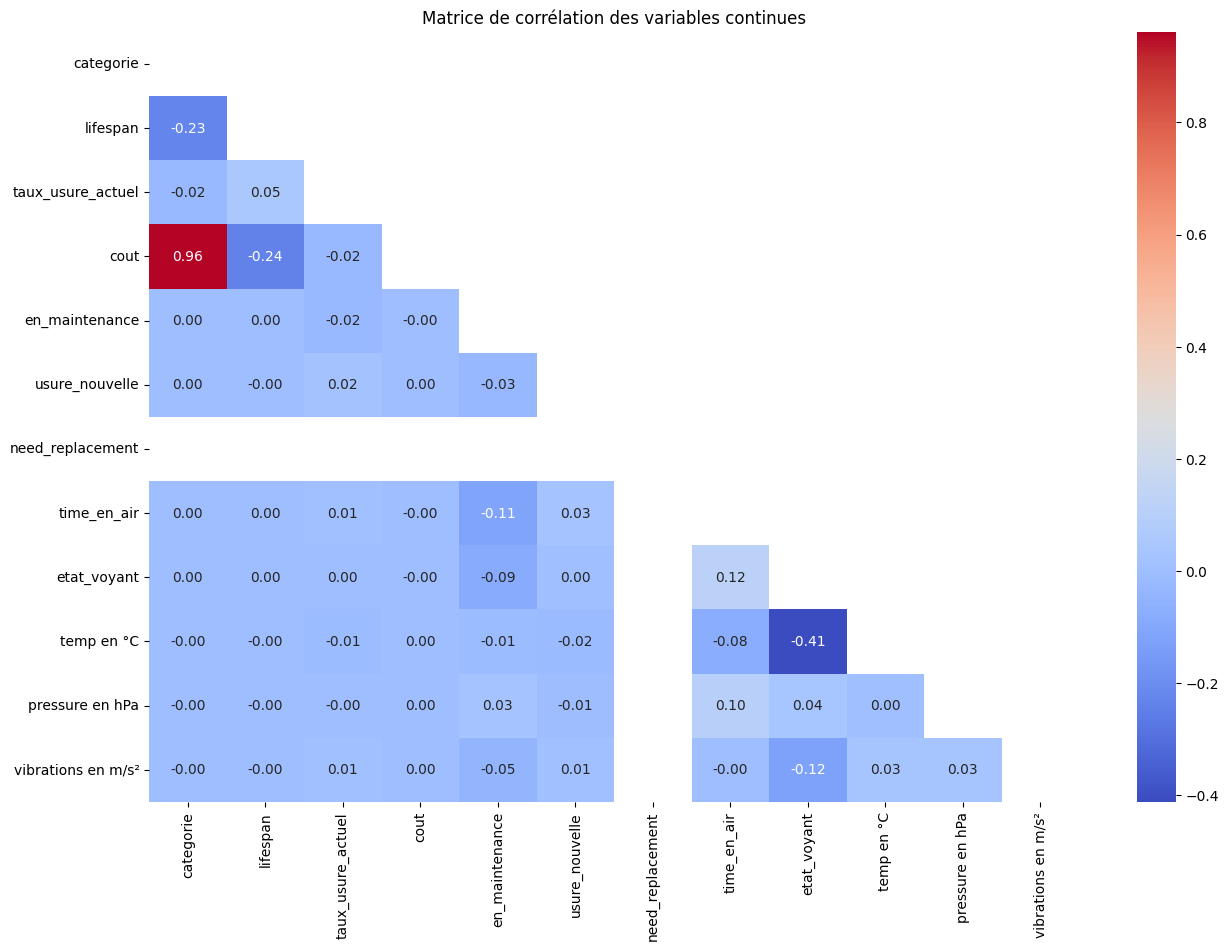

In [119]:
matrix = df.select_dtypes(include=["float", "int"]).corr()
plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, mask=mask, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des variables continues')
plt.show()

# Reorganisation des colonnes des données

In [120]:
df.columns

Index(['categorie', 'id_aero', 'desc', 'lifespan', 'taux_usure_actuel', 'cout',
       'type_model', 'debut_service', 'last_maint', 'en_maintenance',
       'end_maint', 'usure_nouvelle', 'measure_day', 'need_replacement',
       'jour_vol', 'time_en_air', 'etat_voyant', 'temp en °C',
       'pressure en hPa', 'vibrations en m/s²'],
      dtype='object')

In [174]:
order = ['id_aero', 
    'categorie', 
    'type_model', 
    'desc', 
    'debut_service', 
    'last_maint', 
    'jour_vol', 
    'measure_day', 
    'end_maint', 'lifespan', 
    'taux_usure_actuel', 
    'usure_nouvelle',
    'time_en_air',
    'temp en °C',
    'pressure en hPa',
    'vibrations en m/s²',
    'cout',
    'en_maintenance',
    'need_replacement',
    'etat_voyant'
    ]

In [175]:
df = df.reindex(order, axis=1)

# Colonnes date en format date

In [176]:
date_columns = ['debut_service', 'last_maint', 'end_maint', 'jour_vol', 'measure_day']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882900 entries, 0 to 882899
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id_aero             882900 non-null  object        
 1   categorie           882900 non-null  int64         
 2   type_model          882900 non-null  object        
 3   desc                882900 non-null  object        
 4   debut_service       882900 non-null  datetime64[ns]
 5   last_maint          882900 non-null  datetime64[ns]
 6   jour_vol            882900 non-null  datetime64[ns]
 7   measure_day         832275 non-null  datetime64[ns]
 8   end_maint           882900 non-null  datetime64[ns]
 9   lifespan            882900 non-null  float64       
 10  taux_usure_actuel   882900 non-null  float64       
 11  usure_nouvelle      882900 non-null  float64       
 12  time_en_air         882900 non-null  float64       
 13  temp en °C          882900 no

# Standarisation des données pour ML

In [178]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
# séparation des données d'avec la cible
X = df.drop(columns=['etat_voyant'])
y = df['etat_voyant']

In [181]:
# sépararation des variables par types
categorical_columns = X.select_dtypes(include=["object"]).columns
binary_columns = X.select_dtypes(include=["bool"]).columns
numerical_columns = X.select_dtypes(include=["float", "int"]).columns

In [182]:
# Création du transformateur pour les colonnes
preprocessor = ColumnTransformer(
    transformers=[            
        ('continuous', StandardScaler(), numerical_columns), 
        ('categorical', OneHotEncoder(), categorical_columns),        
    ])

# ML Régression logistique

In [183]:
# création du pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [184]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  StandardScaler(),
                                                  Index(['categorie', 'lifespan', 'taux_usure_actuel', 'usure_nouvelle',
       'time_en_air', 'temp en °C', 'pressure en hPa', 'vibrations en m/s²',
       'cout', 'en_maintenance', 'need_replacement'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  Index(['id_aero', 'type_model', 'desc'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [185]:
# Ajustement du pipeline sur les données d'entrainement
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  StandardScaler(),
                                                  Index(['categorie', 'lifespan', 'taux_usure_actuel', 'usure_nouvelle',
       'time_en_air', 'temp en °C', 'pressure en hPa', 'vibrations en m/s²',
       'cout', 'en_maintenance', 'need_replacement'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  Index(['id_aero', 'type_model', 'desc'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [186]:
score_LR = pipeline.score(X_test, y_test)
print('score du modèle de régression logistique', score_LR)

score du modèle de régression logistique 0.9691358024691358


In [187]:
LR_report = classification_report(y_test, y_pred)
print(LR_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    149968
           1       0.89      0.91      0.90     26612

    accuracy                           0.97    176580
   macro avg       0.94      0.94      0.94    176580
weighted avg       0.97      0.97      0.97    176580



In [188]:
matrix = confusion_matrix(y_test, y_pred)

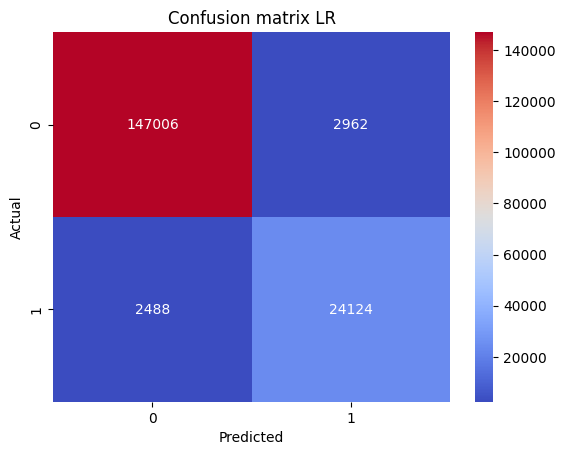

In [189]:
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion matrix LR')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

 # ML KNN classifier

In [190]:
# création du pipeline
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Knn', KNeighborsClassifier())
])
pipeline_knn
# Ajustement du pipeline sur les données d'entrain

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  StandardScaler(),
                                                  Index(['categorie', 'lifespan', 'taux_usure_actuel', 'usure_nouvelle',
       'time_en_air', 'temp en °C', 'pressure en hPa', 'vibrations en m/s²',
       'cout', 'en_maintenance', 'need_replacement'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  Index(['id_aero', 'type_model', 'desc'], dtype='object'))])),
                ('Knn', KNeighborsClassifier())])

In [191]:
# Ajustement du pipeline sur les données d'entrainement
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  StandardScaler(),
                                                  Index(['categorie', 'lifespan', 'taux_usure_actuel', 'usure_nouvelle',
       'time_en_air', 'temp en °C', 'pressure en hPa', 'vibrations en m/s²',
       'cout', 'en_maintenance', 'need_replacement'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  Index(['id_aero', 'type_model', 'desc'], dtype='object'))])),
                ('Knn', KNeighborsClassifier())])

In [192]:
score_Knn = accuracy_score(y_test, y_pred)
score_Knn

0.9691358024691358

In [193]:
Knn_report = classification_report(y_test, y_pred)
print(Knn_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    149968
           1       0.89      0.91      0.90     26612

    accuracy                           0.97    176580
   macro avg       0.94      0.94      0.94    176580
weighted avg       0.97      0.97      0.97    176580



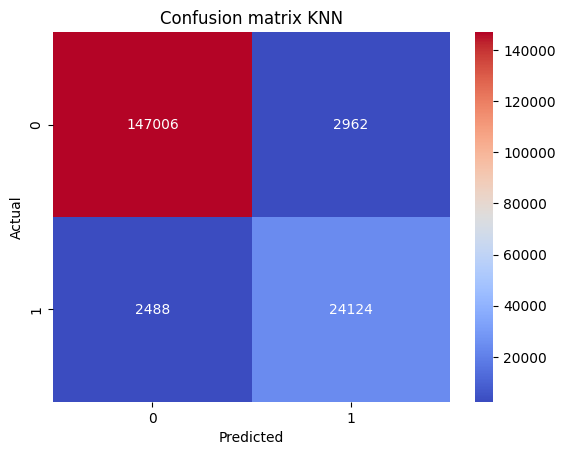

In [194]:
matrix_Knn = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_Knn, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion matrix KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# comparaison des modèles

In [195]:
print('score regression logistique', round(score_LR, 4))
print('score KNN', round(score_Knn, 4))

score regression logistique 0.9691
score KNN 0.9691


# Insertion des prédictions dans le dataframe 'predictions_voyant' à J = 2024-06-10

In [196]:

df['Predictions_voyant'] = pd.DataFrame(pipeline.predict(X))

In [205]:
df.head(10)

,id_aero,categorie,type_model,desc,debut_service,last_maint,jour_vol,measure_day,end_maint,lifespan,...,usure_nouvelle,time_en_air,temp en °C,pressure en hPa,vibrations en m/s²,cout,en_maintenance,need_replacement,etat_voyant,Predictions_voyant
0,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,54.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
1,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,51.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
2,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,18.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
3,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,8.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
4,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,43.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
5,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,7.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
6,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,23.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
7,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,27.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
8,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,4.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
9,E170_6353,2,E170,Réacteur gauche,2000-03-17,2024-03-27,2024-06-06,2024-06-06,1970-01-01,13045.0,...,32.0,1.8,2.9,953.5,0.942,15552.0,0,0,0,0
